Loan Approval Prediction ML

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [52]:
df=pd.read_csv("loan_data_set.csv")

In [53]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [55]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [56]:
df.shape

(614, 13)

In [57]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [58]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [59]:
df['Loan_ID'].value_counts(dropna=False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [60]:
df['Gender'].value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

<AxesSubplot: xlabel='Gender', ylabel='count'>

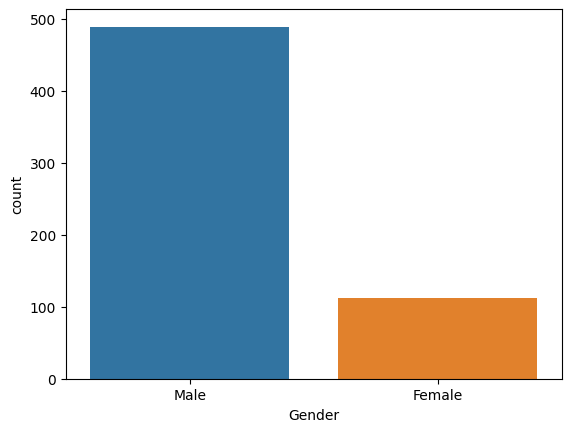

In [61]:
sns.countplot(x='Gender',data=df)

In [62]:
count_male=len(df[df['Gender']=='Male'])
count_female=len(df[df['Gender']=='Female'])
count_null=len(df[df['Gender'].isnull()])

In [63]:
print('Percentage of male applicant: {:.2f}%'.format(count_male/(len(df['Gender']))*100))
print('Percentage of female applicant: {:.2f}%'.format(count_female/(len(df['Gender']))*100))
print('Percentage of missing value applicant: {:.2f}%'.format(count_null/(len(df['Gender']))*100))

Percentage of male applicant: 79.64%
Percentage of female applicant: 18.24%
Percentage of missing value applicant: 2.12%


In [64]:
df.drop('Loan_ID',axis=1,inplace=True)

In [65]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [66]:
df['Gender']=df['Gender'].fillna(df.Gender.dropna().mode()[0])

In [67]:
df['Gender'].value_counts(dropna=False)

Male      502
Female    112
Name: Gender, dtype: int64

In [68]:
df['Gender'].mode()[0]

'Male'

In [69]:
df['Married']=df['Married'].fillna(df.Married.dropna().mode()[0])

In [70]:
df['Married'].value_counts(dropna=False)

Yes    401
No     213
Name: Married, dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [72]:
df['Dependents']=df['Dependents'].fillna(df.Dependents.dropna().mode()[0])

In [73]:
df['Self_Employed']=df['Self_Employed'].fillna(df.Self_Employed.dropna().mode()[0])

In [74]:
df['LoanAmount']=df['LoanAmount'].fillna(df.LoanAmount.dropna().mode()[0])

In [75]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df.Loan_Amount_Term.dropna().mode()[0])

In [76]:
df['Credit_History']=df['Credit_History'].fillna(df.Credit_History.dropna().mode()[0])

In [77]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [78]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0}).astype(int)

In [79]:
df['Married']=df['Married'].map({'Yes':1,'No':0}).astype(int)

In [80]:
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0}).astype(int)

In [81]:
df['Self_Employed']=df['Self_Employed'].map({'Yes':0,'No':1}).astype(int)

In [82]:
df['Property_Area']=df['Property_Area'].map({'Semiurban':2,'Urban':1,'Rural':0}).astype(int)

In [83]:
df['Dependents']=df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3}).astype(int)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.3+ KB


In [96]:
x=df.iloc[:,:11]
y=df.iloc[:,11]
y



0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [104]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=42)

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_validate
from sklearn.metrics import accuracy_score,classification_report

In [118]:
models=[('Decision Tree Classifier',DecisionTreeClassifier()),
('Logistic Regression',LogisticRegression()),
('KNeighbors Classifier',KNeighborsClassifier(,n_neighbors=10)),

('SVC',SVC(kernel='rbf',max_iter=50000)),
('Gaussian NB',GaussianNB()),
('Categorical NB',CategoricalNB()),
('Random Forest Classifier',RandomForestClassifier(n_estimators=1000,random_state=1,max_leaf_nodes=10))]

In [119]:
name=[]
result=[]


for name,model in models:
    kfold=KFold(n_splits=5,shuffle=True,random_state=1)
    cv_result=cross_validate(model,xtrain,ytrain,cv=kfold)
    model.fit(xtrain,ytrain)
    y_pred=model.predict(xtest)
    result.append(round((accuracy_score(ytest,y_pred)*100),2))
    # clf_report=classification_report(ytest,y_pred)
    

    print('the model name {} and accurancy is {}%'.format(name,accuracy_score(ytest,y_pred)*100))
   

    


    




the model name Decision Tree Classifier and accurancy is 68.29268292682927%
the model name Logistic Regression and accurancy is 78.86178861788618%


C:\Users\chordiyg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chordiyg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

the model name KNeighbors Classifier and accurancy is 56.09756097560976%
the model name SVC and accurancy is 65.04065040650406%
the model name Gaussian NB and accurancy is 78.04878048780488%


C:\Users\chordiyg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\chordiyg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\chordiyg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\chordiyg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packa

the model name Categorical NB and accurancy is 75.60975609756098%
the model name Random Forest Classifier and accurancy is 78.86178861788618%


In [120]:
model_acc=pd.DataFrame({'Model':['LogisticRegression','Logistic Regression','KNN','SVC','GaussianNB','CatgorialNB','Random forest classifier'],'Accuracy':result})

In [121]:
model_acc.sort_values(by='Accuracy',ascending=True)

,Model,Accuracy
2,KNN,56.10
3,SVC,65.04
0,LogisticRegression,68.29
5,CatgorialNB,75.61
4,GaussianNB,78.05
1,Logistic Regression,78.86
6,Random forest classifier,78.86
